In [22]:
# Core libraries
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sb

from os import path

dirname ='/Users/xies/Library/CloudStorage/OneDrive-Stanford/Skin/Mesa et al/W-R1/'

dirname = '/Users/xies/OneDrive - Stanford/Skin/Mesa et al/W-R1/'
all_df = pd.read_pickle(path.join(dirname,'Mastodon/single_timepoints_dynamics_aggregated_lookback_history.pkl'))
all_df = all_df.drop_duplicates().sort_index()
tracks = {trackID:t.reset_index(drop=True) for trackID,t in all_df.reset_index().groupby('TrackID')}


## Grab the sister pairs

In [2]:
sisterIDs = set()
sisters = []
for trackID,t in tracks.items():
    if not np.isnan(t.iloc[0]['Sister','Meta']):
        if t.iloc[0]['Sister','Meta'] not in sisterIDs and trackID not in sisterIDs:
            sisterIDs.add(trackID)
            sisterIDs.add(t.iloc[0]['Sister','Meta'])
            sisters.append((t, tracks[int(t.iloc[0]['Sister','Meta'])]))

### Calculate pair-wise 
@Todo: Account for different lifetimes biasing growth rate?

In [18]:
# Things to measure: cell growth rate, fates, cell volume

sister_differences = pd.DataFrame()

for i,(a,b) in enumerate(sisters):
    # Filter for both sisters fate known
    if not a.iloc[0]['Fate known','Meta'] or not b.iloc[0]['Fate known','Meta']:
        continue
    
    a_diff = a.iloc[0]['Will differentiate','Meta']
    b_diff = b.iloc[0]['Will differentiate','Meta']
    if int(a_diff) + int(b_diff) == 1:
        sister_differences.loc[i,'Fate'] = 'Asymmetric'
    else:
        if a_diff:
            sister_differences.loc[i,'Fate'] = 'Differentiate'
        else:
            sister_differences.loc[i,'Fate'] = 'Divide'
            
    sister_differences.loc[i,'Sister a'] = a.iloc[0]['TrackID','']
    sister_differences.loc[i,'Sister b'] = b.iloc[0]['TrackID','']
    
    if sister_differences.loc[i,'Fate'] == 'Divide':
        sister_differences.loc[i,'Diff cell cycle time'] = np.abs(len(a) - len(b)) * 12
    else:
        sister_differences.loc[i,'Diff cell cycle time'] = np.nan

    f = 'Cell volume exponential growth rate'
    sister_differences.loc[i,f'Diff {f}'] = np.abs(a.iloc[0][f,'Measurement'] - b.iloc[0][f,'Measurement'])
    f = 'Nuclear volume exponential growth rate'
    sister_differences.loc[i,f'Diff {f}'] = np.abs(a.iloc[0][f,'Measurement'] - b.iloc[0][f,'Measurement'])
    f = 'Cell volume smoothed'
    sister_differences.loc[i,f'Diff {f} at birth'] = np.abs(a.iloc[0][f,'Measurement'] - b.iloc[0][f,'Measurement'])
    f = 'Nuclear volume smoothed'
    sister_differences.loc[i,f'Diff {f} at birth'] = np.abs(a.iloc[0][f,'Measurement'] - b.iloc[0][f,'Measurement'])
    f = 'Cell volume smoothed'
    sister_differences.loc[i,f'Diff {f} at birth'] = np.abs(a.iloc[0][f,'Measurement'] - b.iloc[0][f,'Measurement'])
    f = 'Basal area'
    sister_differences.loc[i,f'Diff {f} at birth'] = np.abs(a.iloc[0][f,'Measurement'] - b.iloc[0][f,'Measurement'])
    f = 'Height to BM'
    sister_differences.loc[i,f'Diff {f} at birth'] = np.abs(a.iloc[0][f,'Measurement'] - b.iloc[0][f,'Measurement'])
    f = 'Mean curvature'
    sister_differences.loc[i,f'Diff {f} at birth'] = np.abs(a.iloc[0][f,'Measurement'] - b.iloc[0][f,'Measurement'])
    f = 'Collagen intensity'
    sister_differences.loc[i,f'Diff {f} at birth'] = np.abs(a.iloc[0][f,'Measurement'] - b.iloc[0][f,'Measurement'])
    f = 'Basal alignment'
    sister_differences.loc[i,f'Diff {f} at birth'] = np.abs(a.iloc[0][f,'Measurement'] - b.iloc[0][f,'Measurement'])
    

Fate
Asymmetric       0.005568
Differentiate    0.002934
Divide           0.003329
Name: Diff Cell volume exponential growth rate, dtype: float64
Fate
Asymmetric       8.4375
Differentiate    7.3750
Divide           5.8750
Name: Diff Basal area at birth, dtype: float64


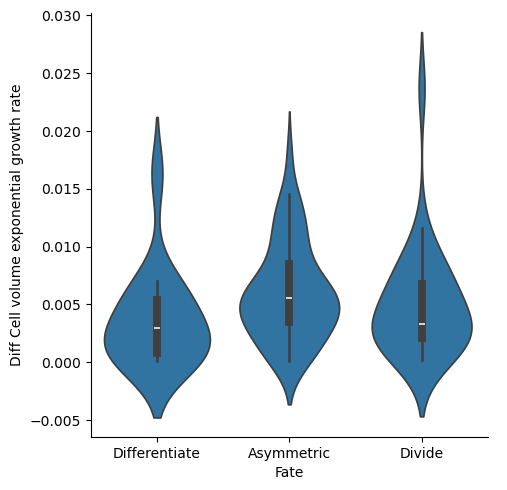

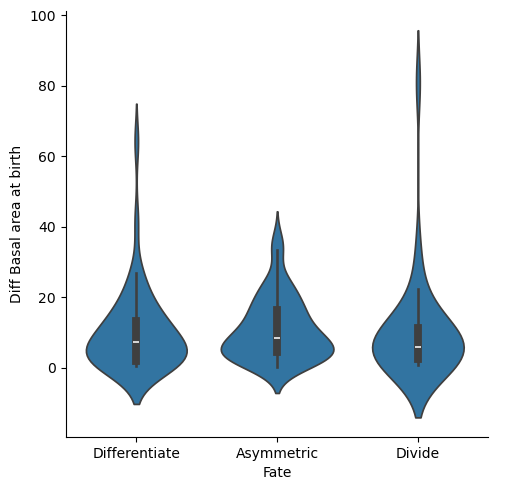

In [9]:
sb.catplot(sister_differences,x='Fate',y='Diff Cell volume exponential growth rate',kind='violin')
sb.catplot(sister_differences,x='Fate',y='Diff Basal area at birth',kind='violin')
print(sister_differences.groupby('Fate')['Diff Cell volume exponential growth rate'].median())
print(sister_differences.groupby('Fate')['Diff Basal area at birth'].median())

Fate
Asymmetric       0.149072
Differentiate    0.147182
Divide           0.141757
Name: Diff Mean curvature at birth, dtype: float64
Fate
Asymmetric       0.113141
Differentiate    0.109520
Divide           0.127960
Name: Diff Collagen intensity at birth, dtype: float64


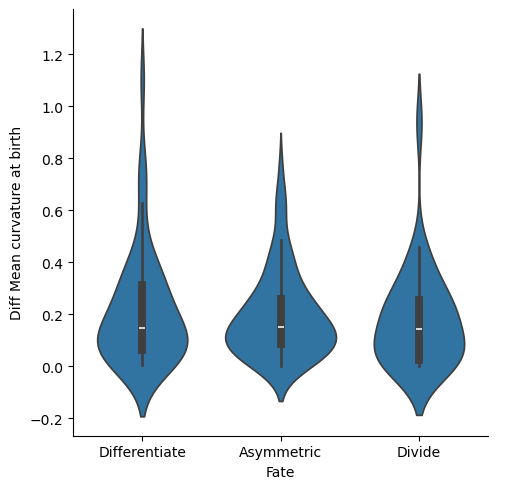

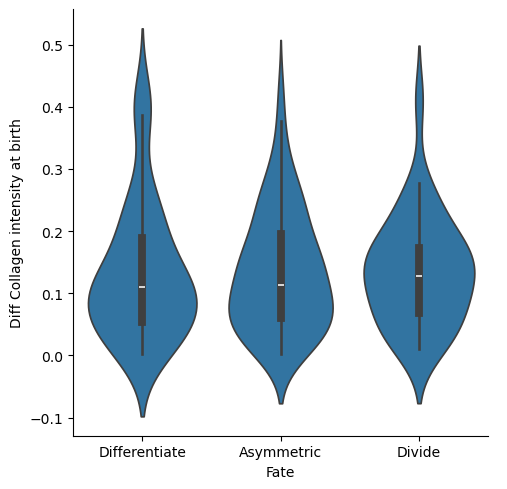

In [6]:
sb.catplot(sister_differences,x='Fate',y='Diff Mean curvature at birth',kind='violin')
sb.catplot(sister_differences,x='Fate',y='Diff Collagen intensity at birth',kind='violin')
print(sister_differences.groupby('Fate')['Diff Mean curvature at birth'].median())
print(sister_differences.groupby('Fate')['Diff Collagen intensity at birth'].median())

Fate
Asymmetric       1.791232
Differentiate    1.936501
Divide           1.169600
Name: Diff Height to BM at birth, dtype: float64


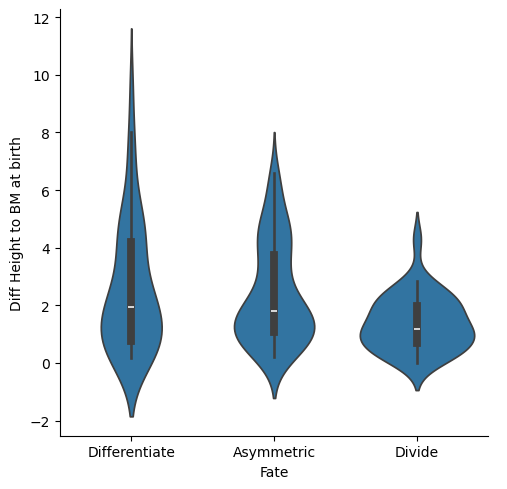

In [17]:
sb.catplot(sister_differences,x='Fate',y='Diff Height to BM at birth',kind='violin')
print(sister_differences.groupby('Fate')['Diff Height to BM at birth'].median())

Fate
Asymmetric       0.314742
Differentiate    0.344429
Divide           0.273741
Name: Diff Basal alignment at birth, dtype: float64


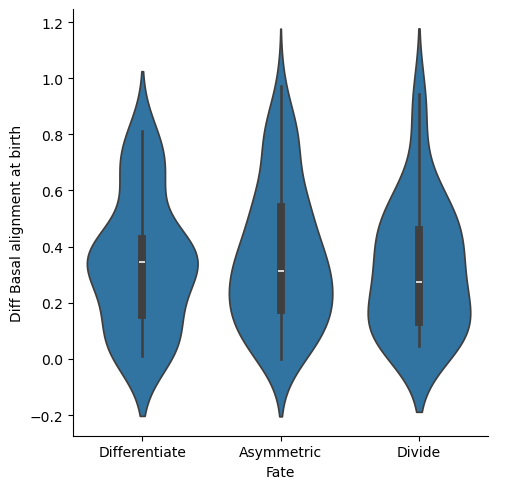

In [21]:
sb.catplot(sister_differences,x='Fate',y='Diff Basal alignment at birth',kind='violin')
print(sister_differences.groupby('Fate')['Diff Basal alignment at birth'].median())

# Systematic differences

True

In [33]:
# Things to measure: cell growth rate, fates, cell volume

sister_differences = pd.DataFrame()

for i,(a,b) in enumerate(sisters):
    # Filter for both sisters fate known
    if not a.iloc[0]['Fate known','Meta'] or not b.iloc[0]['Fate known','Meta']:
        continue
    
    a_diff = a.iloc[0]['Will differentiate','Meta']
    b_diff = b.iloc[0]['Will differentiate','Meta']
    if int(a_diff) + int(b_diff) == 1:
        sister_differences.loc[i,'Fate'] = 'Asymmetric'
    else:
        if a_diff:
            sister_differences.loc[i,'Fate'] = 'Differentiate'
        else:
            sister_differences.loc[i,'Fate'] = 'Divide'
            
    sister_differences.loc[i,'Sister a'] = a.iloc[0]['TrackID','']
    sister_differences.loc[i,'Sister b'] = b.iloc[0]['TrackID','']
    
    if sister_differences.loc[i,'Fate'] == 'Divide':
        sister_differences.loc[i,'Diff cell cycle time'] = np.abs(len(a) - len(b)) * 12
    else:
        sister_differences.loc[i,'Diff cell cycle time'] = np.nan

    for f in a.xs('Measurement',level=1,axis=1).columns:
        sister_differences.loc[i,f'Diff {f}'] = np.abs(a.iloc[0][f,'Measurement'] - b.iloc[0][f,'Measurement'])
    

/var/folders/zp/5k1kvm9j0t19cvq8h628kr8h0000gn/T/ipykernel_26151/3459483060.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sister_differences.loc[i,f'Diff {f}'] = np.abs(a.iloc[0][f,'Measurement'] - b.iloc[0][f,'Measurement'])
/var/folders/zp/5k1kvm9j0t19cvq8h628kr8h0000gn/T/ipykernel_26151/3459483060.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sister_differences.loc[i,f'Diff {f}'] = np.abs(a.iloc[0][f,'Measurement'] - b.iloc[0][f,'Measurement'])
/var/folders/zp/5k1kvm9j0t19cvq8h628kr8h0000gn/T/ipykernel_26151/345

In [34]:
sister_differences

,Fate,Sister a,Sister b,Diff cell cycle time,Diff Nuclear volume,Diff Nuclear solidity,Diff Nuclear bbox top,Diff Nuclear bbox bottom,Diff Z,Diff Y,...,Diff Min adjac nuc_shcoeffs_L4M3S at 1 frame prior,Diff Max adjac nuc_shcoeffs_L2M0C at 1 frame prior,Diff Std adjac Nuclear solidity at 1 frame prior,Diff Mean adjac cyto_shcoeffs_L3M2S at 1 frame prior,Diff Mean adjac Cell volume standard at 1 frame prior,Diff Std adjac cyto_shcoeffs_L4M5C at 1 frame prior,Diff Median adjac Apical area smoothed at 1 frame prior,Diff Std adjac cyto_shcoeffs_L1M5C at 1 frame prior,Diff Num neighbor division 1 frame prior,Diff Num neighbor delamination 1 frame prior
0,Differentiate,3.0,4.0,NaN,14.9375,0.035454,1.0,1.0,1.234093,0.709161,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Differentiate,6.0,7.0,NaN,11.0000,0.005225,2.0,2.0,3.002297,0.026890,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Differentiate,9.0,10.0,NaN,34.3750,0.024132,4.0,4.0,4.613897,3.888272,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
4,Asymmetric,15.0,16.0,NaN,63.6250,0.063318,0.0,2.0,1.286218,0.439006,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
6,Asymmetric,20.0,23.0,NaN,18.0625,0.021638,1.0,3.0,2.042366,2.389261,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,Asymmetric,1052.0,1053.0,NaN,6.3750,0.041802,6.0,7.0,6.587377,3.424709,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
375,Asymmetric,1057.0,1060.0,NaN,40.3125,0.014851,5.0,1.0,3.059219,0.542245,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
377,Divide,1063.0,1066.0,0.0,30.6250,0.005045,1.0,1.0,1.219404,5.594648,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
380,Asymmetric,1075.0,1076.0,NaN,1.5000,0.002470,0.0,1.0,0.768163,2.018575,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
